In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

C:\Users\ojare\anaconda3\envs\tensorflow\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Create your input pipeline

In [6]:
# load dataset
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

In [7]:
# build a trainable pipeline
def normalize_img(image, label):
    """Normalizes images: 'uint8' -> 'float32.'"""
    return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE
)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [8]:
# building an evaluation pipeline
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE
)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

#### Train the model

In [15]:
model = Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

epochs = 10
history = model.fit(
    ds_train,
    epochs=epochs,
    validation_data=ds_test
)

Epoch 1/10
469/469 [==============================] - 5s 7ms/step - loss: 0.3574 - sparse_categorical_accuracy: 0.9016 - val_loss: 0.1929 - val_sparse_categorical_accuracy: 0.9452
Epoch 2/10
469/469 [==============================] - 4s 7ms/step - loss: 0.1669 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.1367 - val_sparse_categorical_accuracy: 0.9598
Epoch 3/10
469/469 [==============================] - 4s 7ms/step - loss: 0.1202 - sparse_categorical_accuracy: 0.9656 - val_loss: 0.1094 - val_sparse_categorical_accuracy: 0.9669
Epoch 4/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0925 - sparse_categorical_accuracy: 0.9733 - val_loss: 0.0945 - val_sparse_categorical_accuracy: 0.9719
Epoch 5/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0749 - sparse_categorical_accuracy: 0.9786 - val_loss: 0.0887 - val_sparse_categorical_accuracy: 0.9737
Epoch 6/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0611 - sparse_categorica

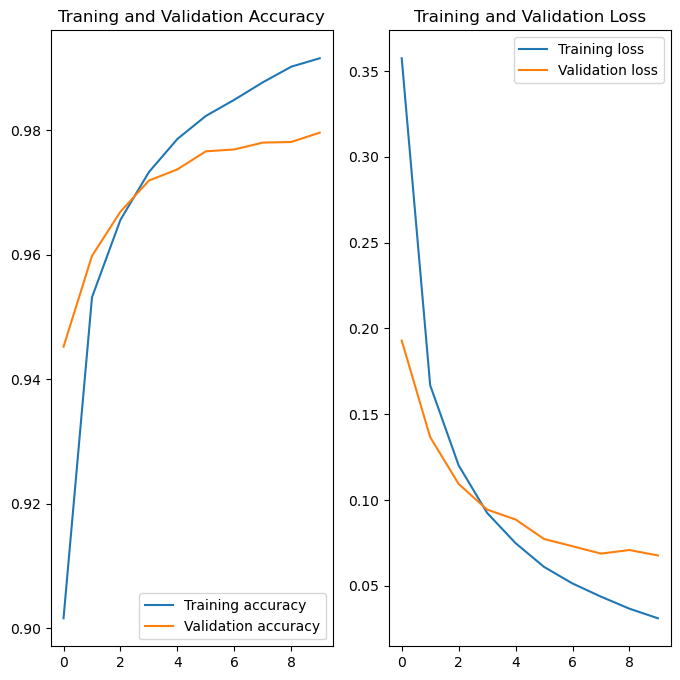

In [16]:
# Visualizing the training results

acc = history.history["sparse_categorical_accuracy"]
val_acc = history.history["val_sparse_categorical_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training accuracy")
plt.plot(epochs_range, val_acc, label="Validation accuracy")
plt.legend(loc="lower right")
plt.title("Traning and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training loss")
plt.plot(epochs_range, val_loss, label="Validation loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()